In [66]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error

In [67]:
headers = ["CompPrice", "Income", "Advertising", "Population", "Price", "ShelveLoc", "Age", "Education", "Urban", "US"]

In [68]:
def text_to_int(X):
    X = np.array(X)
    X[X=="Yes"]=1
    X[X=="No"]=0
    X[X=="Bad"]=0
    X[X=="Medium"]=1
    X[X=="Good"]=2
#     print(X[:50, [5, 8, 9]])
    return X

In [69]:
def plot_stats(table, X, y):
    display(table.describe())
    
    plt.title("Sales Distribution")
    plt.hist(y, bins='auto', edgecolor='black')
    plt.xlabel('Sales')
    plt.ylabel('Count')
    plt.show()
    
    index = 0
    for i in headers:
        col = X[:,index]
        if i in ["ShelveLoc", "Urban", "US"]:
            if i == "ShelveLoc":
                count = [np.count_nonzero(col==0), np.count_nonzero(col==1),np.count_nonzero(col==2)]
                name = ["Bad", "Medium", "Good"]
            else:
                count = [np.count_nonzero(col==0), np.count_nonzero(col==1)]
                name = ["No", "Yes"]
                
            plt.title("%s Distribution" %i)
            plt.bar(name, count, width=0.5)
            plt.ylabel('Count')
            plt.show()
            index += 1
            continue
    
        plt.figure()
        plt.subplot(1,2,1)
        plt.title("%s Distribution" %i)
        plt.hist(col, bins='auto', edgecolor='black')
        plt.xlabel(i)
        plt.ylabel('Count')
        
        plt.subplot(1,2,2)
        plt.title("Relationship with Sales")
        plt.scatter(col, y, s=10, alpha=0.5)
        plt.xlabel(i)
        plt.ylabel('Sales')
        
        plt.tight_layout()
        plt.show()
        
        index += 1


In [70]:
def decision_tree(depth, nodesize, flag=0):
    clf = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=nodesize)
    clf.fit(X_train, y_train)
    
    y_tr_predict = clf.predict(X_train)
    train_mse = mean_squared_error(y_train, y_tr_predict)
    train_err = 1- clf.score(X_train, y_train)
    
    y_ts_predict = clf.predict(X_test)
    test_mse = mean_squared_error(y_test, y_ts_predict)
    test_err = 1- clf.score(X_test, y_test)
    


#   default print outcome
    if flag == 0:
        print("Max_depth:", depth, " Least node size:", nodesize)
        print('Training MSE: ', train_mse)
        print('Testing MSE: ', test_mse)
        print('Training Error: ', train_err)
        print('Testing Error: ', test_err)
        print('\n')
        
#   plot tree  
    elif (flag == 1):
        name = "depth"+str(depth)+"size"+str(nodesize)+'.png'
        plot_tree(clf, feature_names=headers, filled=True, impurity=True)
        plt.savefig(fname=name, dpi=600)    

In [71]:
def bagging_tree(depth, n_trees):
    clf = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=depth), n_estimators=n_trees)
    clf.fit(X_train, y_train.ravel())
    
    y_tr_predict = clf.predict(X_train)
    train_mse = mean_squared_error(y_train, y_tr_predict)
    train_err = 1- clf.score(X_train, y_train)

    y_ts_predict = clf.predict(X_test)
    test_mse = mean_squared_error(y_test, y_ts_predict)
    test_err = 1- clf.score(X_test, y_test)
    
    print("Max_depth:", depth, "Number of trees:", n_trees)
    print('Training MSE: ', train_mse)
    print('Testing MSE: ', test_mse)
    print('Training Error: ', train_err)
    print('Testing Error: ', test_err)
    print('\n')

In [72]:
def random_forest(n_trees, max_feats="sqrt", flag=0):
    clf = RandomForestRegressor(n_estimators=n_trees, max_features=max_feats)
#     clf.fit(X_train, y_train.ravel())
    
    if flag == 1:
        loss, bias, var = bias_variance_decomp(clf, X_train, y_train.ravel(), X_test, y_test.ravel(), loss='mse')
        return [bias**2, var]
    
    clf.fit(X_train, y_train.ravel())
    y_tr_predict = clf.predict(X_train)
    train_mse = mean_squared_error(y_train, y_tr_predict)
    train_err = 1- clf.score(X_train, y_train)
    
    y_ts_predict = clf.predict(X_test)
    test_mse = mean_squared_error(y_test, y_ts_predict)
    test_err = 1- clf.score(X_test, y_test)
    
    print("Number of trees:", n_trees, "Max features to split:", max_feats)
    print('Training MSE: ', train_mse)
    print('Testing MSE: ', test_mse)
    print('Training Error: ', train_err)
    print('Testing Error: ', test_err)
    print('\n')

In [73]:
def plot_relation(name, n_trees, attributes):
    plt.figure() 
    plt.title(name) 
    plt.plot(n_trees, attributes, label='Random Forests', color='red') 
    plt.xlabel('Number of trees')
    plt.ylabel(name)
    plt.legend()  
    plt.show()

In [74]:
# data preparation

df = pd.read_csv("./Carseats.txt")
tbl = df

df = df.to_numpy()
y, X = np.split(df, (1,), axis=1)
X = text_to_int(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


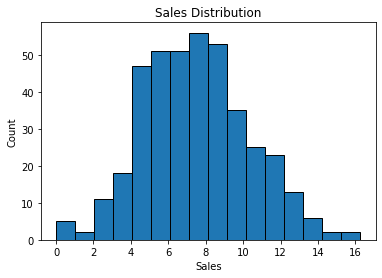

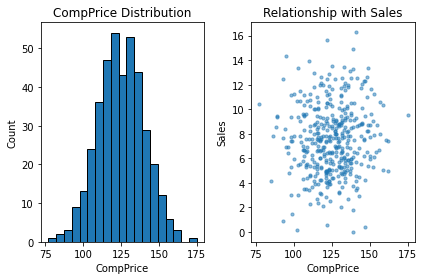

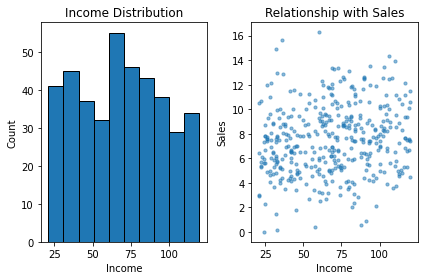

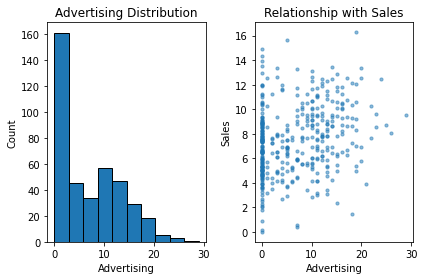

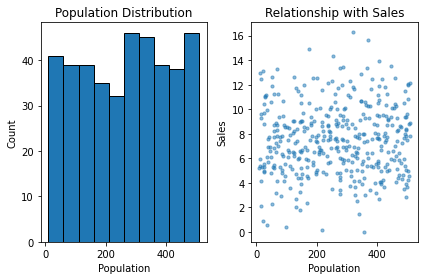

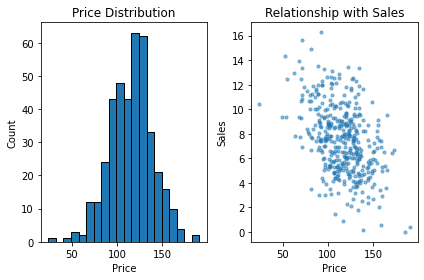

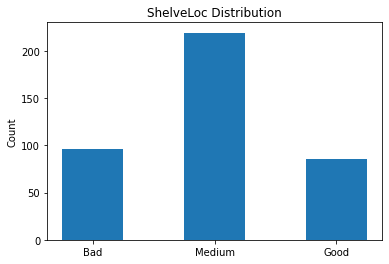

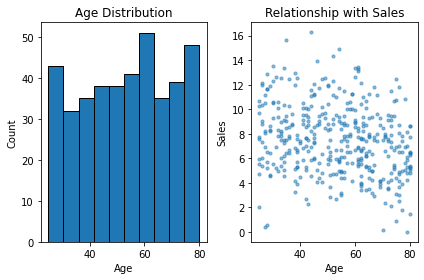

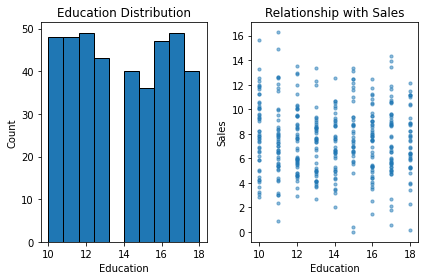

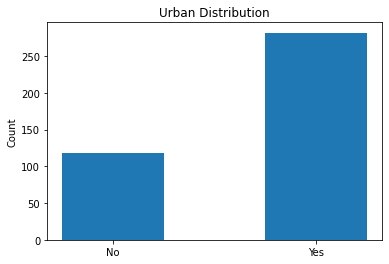

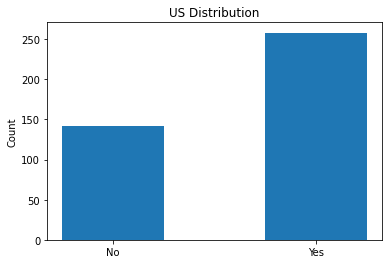

In [75]:
# data analysis and visualization

plot_stats(tbl, X, y)

In [76]:
# Decision Tree

for i in range(2,15):
    decision_tree(depth = 8, nodesize = i)
for i in range(2,15):
    decision_tree(depth = i, nodesize = 10)

Max_depth: 8  Least node size: 2
Training MSE:  0.5122717084295334
Testing MSE:  4.759858693745025
Training Error:  0.06419555460655224
Testing Error:  0.6145395199878354


Max_depth: 8  Least node size: 3
Training MSE:  0.7029722129629629
Testing MSE:  4.726847718888889
Training Error:  0.08809327226463526
Testing Error:  0.6102775134982144


Max_depth: 8  Least node size: 4
Training MSE:  0.9087987042328041
Testing MSE:  4.768562909824263
Training Error:  0.11388650960794977
Testing Error:  0.6156633106537714


Max_depth: 8  Least node size: 5
Training MSE:  1.0797185793650794
Testing MSE:  4.526661655620432
Training Error:  0.13530540898663446
Testing Error:  0.5844317363135015


Max_depth: 8  Least node size: 6
Training MSE:  1.3453993395382395
Testing MSE:  4.296434088120781
Training Error:  0.16859931038105924
Testing Error:  0.5547073373507493


Max_depth: 8  Least node size: 7
Training MSE:  1.565306288103563
Testing MSE:  3.97536194008092
Training Error:  0.19615704642754905
T

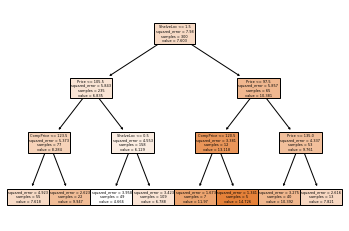

In [78]:
# Plot Sample Decision Tree

decision_tree(depth = 3, nodesize = 3, flag=1)

In [79]:
# Bagging Trees

for i in range(10,101,10):
    bagging_tree(depth=10, n_trees=i)
for i in range(2,15):
    bagging_tree(depth=i, n_trees=80)

Max_depth: 10 Number of trees: 10
Training MSE:  0.6062929090102176
Testing MSE:  2.8591728026560124
Training Error:  0.07597786273860707
Testing Error:  0.3691442949799094


Max_depth: 10 Number of trees: 20
Training MSE:  0.43748198737708266
Testing MSE:  2.852810152970641
Training Error:  0.054823247795874996
Testing Error:  0.3683228210801406


Max_depth: 10 Number of trees: 30
Training MSE:  0.3895574410743809
Testing MSE:  2.8057188431356326
Training Error:  0.04881756218305622
Testing Error:  0.3622429198049969


Max_depth: 10 Number of trees: 40
Training MSE:  0.4116757203881418
Testing MSE:  2.6719134961926945
Training Error:  0.051589324090116184
Testing Error:  0.3449674755170864


Max_depth: 10 Number of trees: 50
Training MSE:  0.4176169569232895
Testing MSE:  2.911183239665395
Training Error:  0.05233385276141789
Testing Error:  0.3758592987332994


Max_depth: 10 Number of trees: 60
Training MSE:  0.37787592583047747
Testing MSE:  2.630656097484267
Training Error:  0.0473

In [80]:
# Random Forest 

for i in range(10,101,10): 
    random_forest(n_trees=i, max_feats=8)
for i in range(2,15):
    random_forest(n_trees=80, max_feats=i)

Number of trees: 10 Max features to split: 8
Training MSE:  0.5611320200000001
Testing MSE:  2.8564846299999993
Training Error:  0.07031850605575674
Testing Error:  0.3687972283042029


Number of trees: 20 Max features to split: 8
Training MSE:  0.3813968133333333
Testing MSE:  2.7564086200000006
Training Error:  0.04779490952597265
Testing Error:  0.35587653735417213


Number of trees: 30 Max features to split: 8
Training MSE:  0.35916628000000017
Testing MSE:  3.1172963900000012
Training Error:  0.04500908045704399
Testing Error:  0.4024703148620472


Number of trees: 40 Max features to split: 8
Training MSE:  0.40527686625000003
Testing MSE:  2.6735515699999994
Training Error:  0.05078744886748532
Testing Error:  0.34517896521794


Number of trees: 50 Max features to split: 8
Training MSE:  0.4000415804000001
Testing MSE:  2.6682507520000014
Training Error:  0.0501313867170009
Testing Error:  0.34449458310518055


Number of trees: 60 Max features to split: 8
Training MSE:  0.3676027

In [81]:
# Bias and Variance
# this will take about 2 mins, please wait...
trees_num = [i for i in range(10, 101, 10)]
bias_2 = []
variance = []

# max_feats are selected as 9 (from last question)
for i in trees_num: 
    ret = random_forest(n_trees=i, max_feats= 9, flag=1)
    bias_2.append(ret[0])
    variance.append(ret[1])

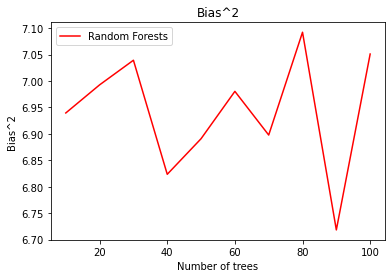

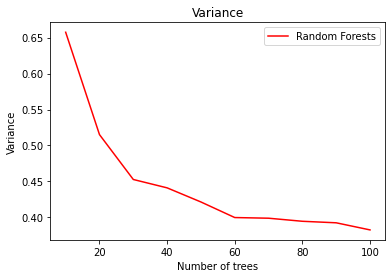

In [82]:
plot_relation("Bias^2",trees_num, bias_2)
plot_relation("Variance",trees_num, variance)